<a href="https://colab.research.google.com/github/merdogan97/DL_Deep-Learning/blob/main/DL_Assignment_3_(Time_Series_with_RNN_Product_Amount_Forecast_by_Time)_04_07_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# **Import Libraries**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# **Indest Data**

In [51]:
df = pd.read_csv('/content/Frozen_Dessert_Production.csv', index_col='DATE', parse_dates=True)

# **Exploratory Data Analysis and Visualization**

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [52]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [54]:
df.columns = ['Production']

In [55]:
df.head()

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


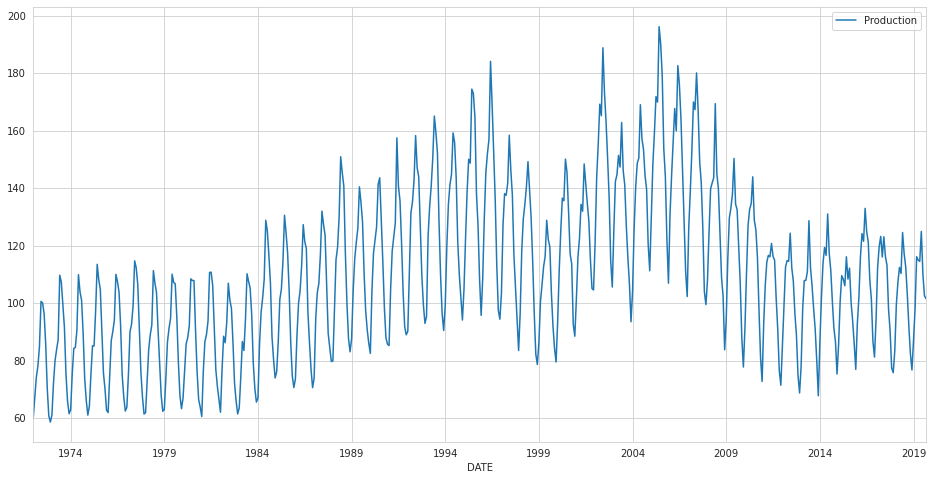

In [56]:
df.plot(figsize=(16,8))

# **Preprocessing of Data**

## Train Test Split

In [57]:
test_size = 24

In [58]:
test_ind = len(df)- test_size

In [59]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

# **Scaling**

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [62]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# **Time Series Generator**

In [63]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [64]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [65]:
X, y = generator[0]

In [66]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# **Modelling & Model Performance**

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
n_features = train_scaled.shape[1]

## **with "tanh" activation function**

In [69]:
model = Sequential()
model.add(LSTM(64, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'tanh', return_sequences=True))
model.add(LSTM(16, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 12, 64)            16896     
                                                                 
 lstm_7 (LSTM)               (None, 12, 32)            12416     
                                                                 
 lstm_8 (LSTM)               (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [71]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [72]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 16s 19ms/step - loss: 0.0249 - val_loss: 0.0057
Epoch 2/20
537/537 [==============================] - 10s 19ms/step - loss: 0.0112 - val_loss: 0.0036
Epoch 3/20
537/537 [==============================] - 9s 17ms/step - loss: 0.0072 - val_loss: 0.0033
Epoch 4/20
537/537 [==============================] - 9s 17ms/step - loss: 0.0055 - val_loss: 0.0018
Epoch 5/20
537/537 [==============================] - 9s 17ms/step - loss: 0.0058 - val_loss: 0.0024
Epoch 6/20
537/537 [==============================] - 9s 16ms/step - loss: 0.0049 - val_loss: 0.0023
Epoch 7/20
537/537 [==============================] - 9s 16ms/step - loss: 0.0049 - val_loss: 0.0060
Epoch 8/20
537/537 [==============================] - 9s 17ms/step - loss: 0.0043 - val_loss: 0.0020
Epoch 9/20
537/537 [==============================] - 9s 16ms/step - loss: 0.0047 - val_loss: 0.0022


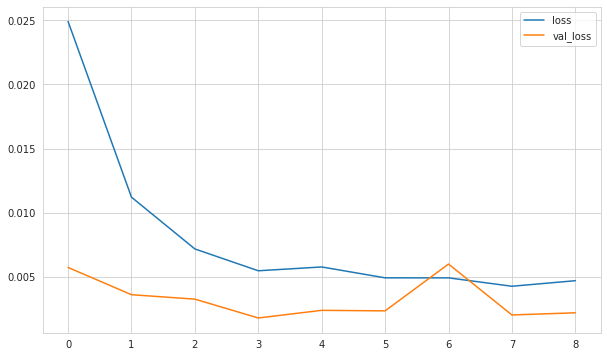

In [73]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## **Evaluation on Test Data**

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [75]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [76]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

## **Inverse Transformation and Comparing**

In [77]:
predictions = scaler.inverse_transform(predictions_scaled)

In [78]:
compare = test[:12]
compare['Predictions_tanh'] = predictions
compare

,Production,Predictions_tanh
DATE,,
2017-10-01,90.473,90.334
2017-11-01,77.438,84.143
2017-12-01,75.812,89.008
2018-01-01,83.434,100.628
2018-02-01,99.490,110.716
2018-03-01,107.315,116.296
2018-04-01,112.431,119.989
2018-05-01,110.354,121.365
2018-06-01,124.584,122.516


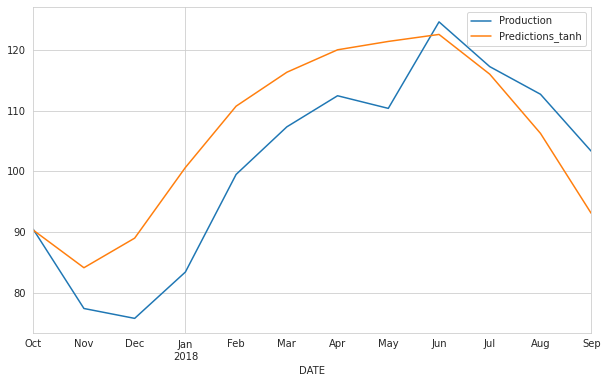

In [79]:
compare.plot()

In [80]:
eval_metrics(compare.Production, compare.Predictions_tanh)

r2_score: 0.6284399267816926 
mae: 7.997920041755338 
mse: 87.62155140051942 
rmse: 9.360638407743322


## **with "relu" activation function**

In [81]:
model = Sequential()
model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [82]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 12, 64)            16896     
                                                                 
 lstm_10 (LSTM)              (None, 12, 32)            12416     
                                                                 
 lstm_11 (LSTM)              (None, 16)                3136      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [83]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [84]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 12s 16ms/step - loss: 0.0318 - val_loss: 0.0072
Epoch 2/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0122 - val_loss: 0.0017
Epoch 3/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0091 - val_loss: 0.0023
Epoch 4/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0080 - val_loss: 0.0016
Epoch 5/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0074 - val_loss: 0.0058
Epoch 6/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0067 - val_loss: 0.0033
Epoch 7/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0082 - val_loss: 0.0019
Epoch 8/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0069 - val_loss: 0.0016
Epoch 9/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0072 - val_loss: 0.0031
Epoch 10/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0073 - val_l

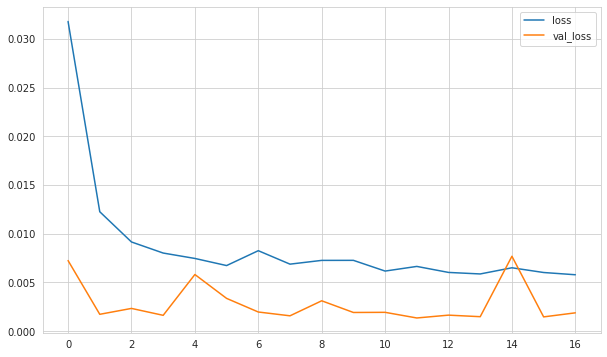

In [85]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## **Evaluation on Test Data**

In [86]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

## **Inverse Transformation and Comparing**

In [87]:
predictions = scaler.inverse_transform(predictions_scaled)

In [88]:
compare['Predictions_relu'] = predictions
compare

,Production,Predictions_tanh,Predictions_relu
DATE,,,
2017-10-01,90.473,90.334,101.606
2017-11-01,77.438,84.143,88.632
2017-12-01,75.812,89.008,87.895
2018-01-01,83.434,100.628,99.816
2018-02-01,99.490,110.716,113.100
2018-03-01,107.315,116.296,118.677
2018-04-01,112.431,119.989,119.061
2018-05-01,110.354,121.365,117.827
2018-06-01,124.584,122.516,120.604


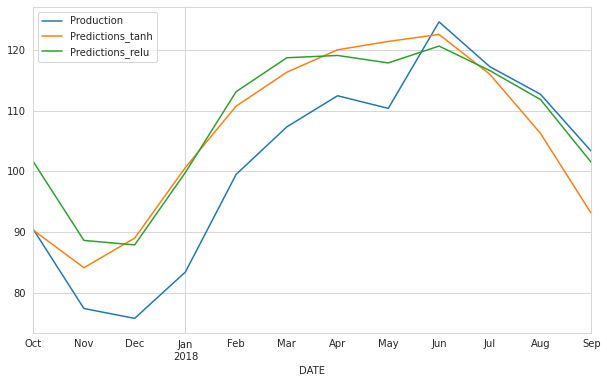

In [89]:
compare.plot()

In [90]:
eval_metrics(compare.Production, compare.Predictions_relu)

r2_score: 0.61194807099445 
mae: 8.099281111113976 
mse: 91.51067214763155 
rmse: 9.56612106068241


# **Retrain and Forecasting**

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [91]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [92]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [95]:
model = Sequential()

model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=10)

Epoch 1/10
561/561 [==============================] - 13s 15ms/step - loss: 0.0299
Epoch 2/10
561/561 [==============================] - 8s 15ms/step - loss: 0.0129
Epoch 3/10
561/561 [==============================] - 8s 15ms/step - loss: 0.0083
Epoch 4/10
561/561 [==============================] - 8s 15ms/step - loss: 0.0073
Epoch 5/10
561/561 [==============================] - 8s 15ms/step - loss: 0.0068
Epoch 6/10
561/561 [==============================] - 9s 15ms/step - loss: 0.0063
Epoch 7/10
561/561 [==============================] - 8s 15ms/step - loss: 0.0065
Epoch 8/10
561/561 [==============================] - 8s 15ms/step - loss: 0.0068
Epoch 9/10
561/561 [==============================] - 10s 18ms/step - loss: 0.0060
Epoch 10/10
561/561 [==============================] - 11s 19ms/step - loss: 0.0057


In [96]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [97]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[104.66955779],
       [ 89.11488026],
       [ 87.52664467],
       [101.17028924],
       [120.04744162],
       [131.34153814],
       [131.73564887],
       [138.20607119],
       [139.67564038],
       [127.12154194],
       [121.19654533],
       [122.32173585]])

In [98]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [99]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [100]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2019-10-01,104.670
2019-11-01,89.115
2019-12-01,87.527
2020-01-01,101.170
2020-02-01,120.047
2020-03-01,131.342
2020-04-01,131.736
2020-05-01,138.206
2020-06-01,139.676
2020-07-01,127.122


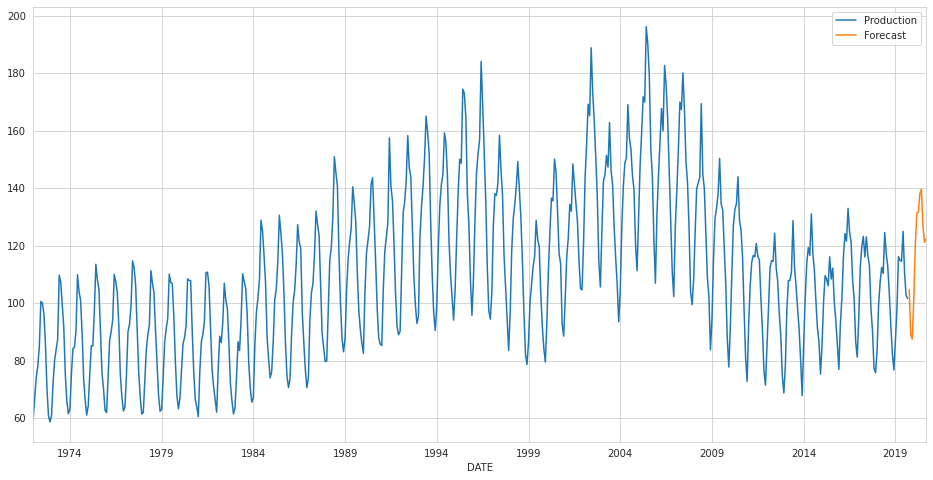

In [101]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 620.0)

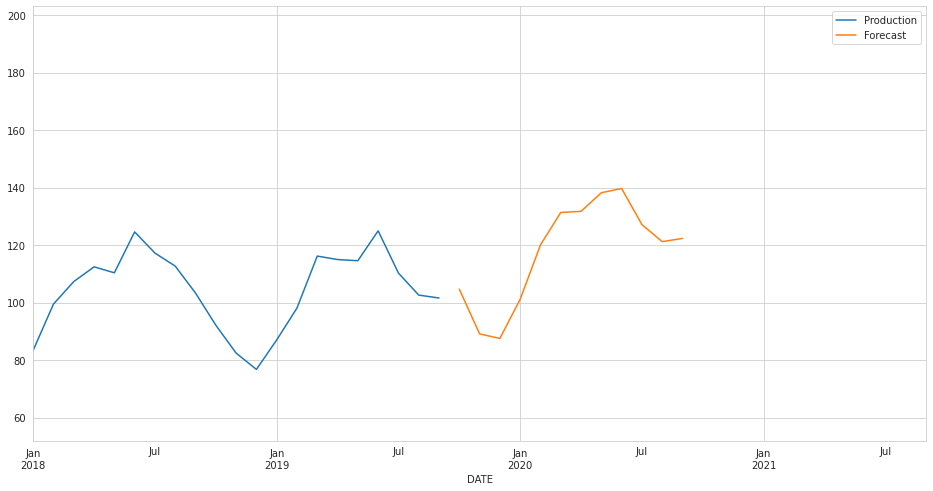

In [102]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2021-09-01')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___